In [1]:
from collections import OrderedDict

import hddm
import kabuki
import numpy as np

from safaribook import safariplot as splot
splot.style(theme='safari-day', spines=False, grid=True, fscale=1.5, figsize=(7,5))

pal = sns.color_palette(['#edb120', '#00c4aa', '#325587'][::-1])
eclrs = ['#be890c', '#009c96', '#143773'][::-1]
clrs = ['#edb120', '#00c4aa', '#4655af'][::-1]

print(hddm.__version__)
print(kabuki.__version__)
print(np.__version__)

0.6.1
0.6.1
1.11.3


### Legend Key for Columns in **df** Header

$$\\\$$

| **Header Label** | **Definition** |
|:---------------:|:-----------:|
| **dL_rate_rt** | Left D1 FR at RT |
| **iL_rate_rt** | Left D2 FR at RT |
| **dR_rate_rt** | Right D1 FR at RT |
| **iR_rate_rt** | Right D2 FR at RT |
| **D_LR_diff** | dL_rate_rt - dR_rate_rt |
| **I_LR_mean** | Average D2 FR across L & R channels at RT  |
| **ID_diff_chosen** | D2 FR - D1 FR at RT in selected channel |
| **DI_diff_chosen** | D1 FR - D2 FR at RT in selected channel |
| **I_max_chosen** | Max D2 FR in selected channel  |

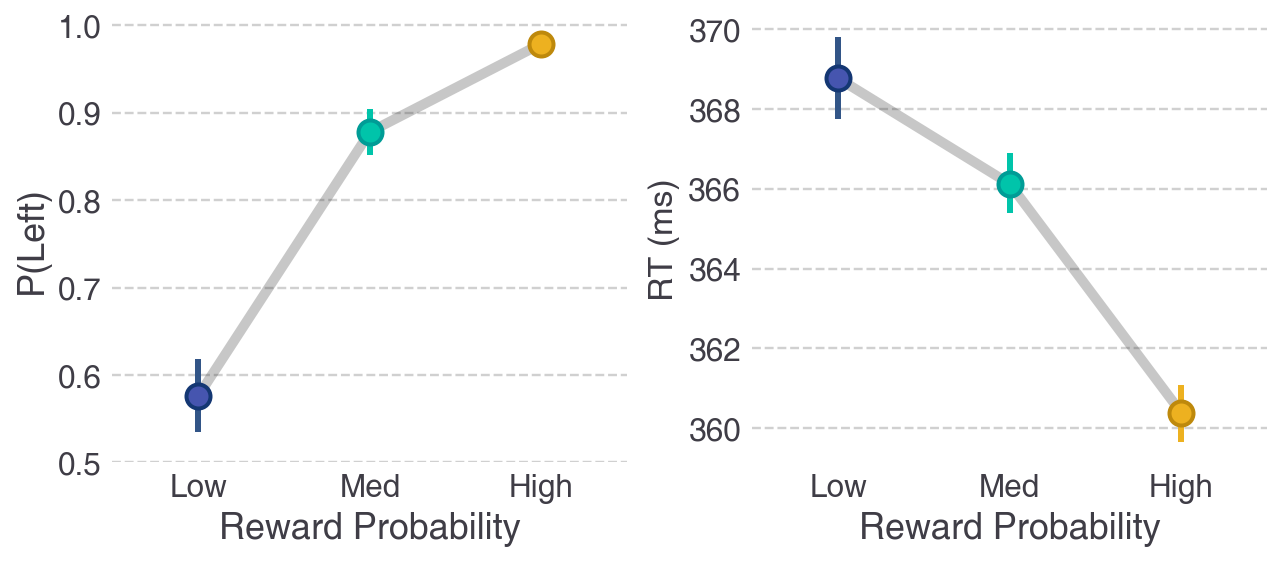

In [8]:
plot_mean_acc_rt(df)

In [36]:
data.head()

,subj_idx,cond,cond2,level,wdL,wiL,wdR,wiR,response,acc,...,rt,dL_rate_rt,iL_rate_rt,dR_rate_rt,iR_rate_rt,D_LR_diff,I_LR_mean,ID_diff_chosen,DI_diff_chosen,I_max_chosen
0,1,low,a,1,1.01,1.0,1.0,1.0,1,1,...,0.377,31.75,24.25,19.25,36.00,12.50,30.125,-7.50,7.50,24.25
1,1,low,a,1,1.01,1.0,1.0,1.0,1,1,...,0.365,34.00,40.25,33.75,42.25,0.25,41.250,6.25,-6.25,40.25
2,1,low,a,1,1.01,1.0,1.0,1.0,1,1,...,0.383,32.50,33.25,30.00,39.00,2.50,36.125,0.75,-0.75,33.25
3,1,low,a,1,1.01,1.0,1.0,1.0,1,1,...,0.367,28.25,29.00,22.75,30.50,5.50,29.750,0.75,-0.75,29.00
4,1,low,a,1,1.01,1.0,1.0,1.0,1,1,...,0.367,31.75,36.75,27.50,33.75,4.25,35.250,5.00,-5.00,36.75


In [13]:
incl = ['z']
thresholdVar = 'I_LR_mean'
driftVar = 'D_LR_diff'

va = hddm.HDDMRegressor(data, ["v ~ D_LR_diff:C(level)", 'a ~ I_LR_mean:C(level)'], bias=True, include=incl, informative=True)

va.sample(500, 200)

Adding these covariates:
['v_Intercept', 'v_D_LR_diff:C(level)[1]', 'v_D_LR_diff:C(level)[2]', 'v_D_LR_diff:C(level)[3]']
Adding these covariates:
['a_Intercept', 'a_I_LR_mean:C(level)[1]', 'a_I_LR_mean:C(level)[2]', 'a_I_LR_mean:C(level)[3]']
 [-----------------100%-----------------] 500 of 500 complete in 114.4 sec

In [37]:
va.print_stats()

                         mean        std     2.5q      25q      50q      75q    97.5q     mc err
t                      0.3304  7.355e-05   0.3302   0.3303   0.3304   0.3304   0.3305    4.9e-06
z                      0.3126   0.007196   0.2992   0.3076   0.3121    0.317   0.3292  0.0005768
v_Intercept             5.386      0.177    5.037    5.257    5.374    5.524    5.697    0.01443
v_D_LR_diff:C(lev...   0.3864    0.02672   0.3362   0.3673   0.3876   0.4072    0.431   0.001594
v_D_LR_diff:C(lev...   0.4192    0.02593   0.3633   0.4041   0.4196   0.4362   0.4687   0.001933
v_D_LR_diff:C(lev...   0.5459    0.02827   0.4854   0.5258   0.5497   0.5642   0.6033   0.002191
a_Intercept           0.07157    0.02583  0.02612  0.05049  0.06776   0.0967   0.1192   0.002561
a_I_LR_mean:C(lev...  0.01276  0.0008012   0.0113  0.01205  0.01278  0.01342  0.01425   7.78e-05
a_I_LR_mean:C(lev...  0.01393  0.0007987  0.01254  0.01323  0.01396  0.01457  0.01524  7.804e-05
a_I_LR_mean:C(lev...   0.0145 

In [23]:
# param est.

t = 0.3304
z = 0.3126


v0 = 5.386
vBetaLow = 0.3864
vBetaMed = 0.4192
vBetaHigh = 0.5459

a0 = 0.07157
aBetaLow = 0.01276
aBetaMed = 0.01393
aBetaHigh = 0.0145


In [38]:
data[data.cond=='low'][driftVar] 

0      12.50
1       0.25
2       2.50
3       5.50
4       4.25
5      -1.50
6       7.00
7      -9.75
8     -12.25
9       7.75
       ...  
990    -6.00
991     3.00
992    -2.25
993     7.25
994     2.00
995     2.25
996     1.75
997    -2.25
998     1.00
999    -6.00
Name: D_LR_diff, Length: 1000, dtype: float64

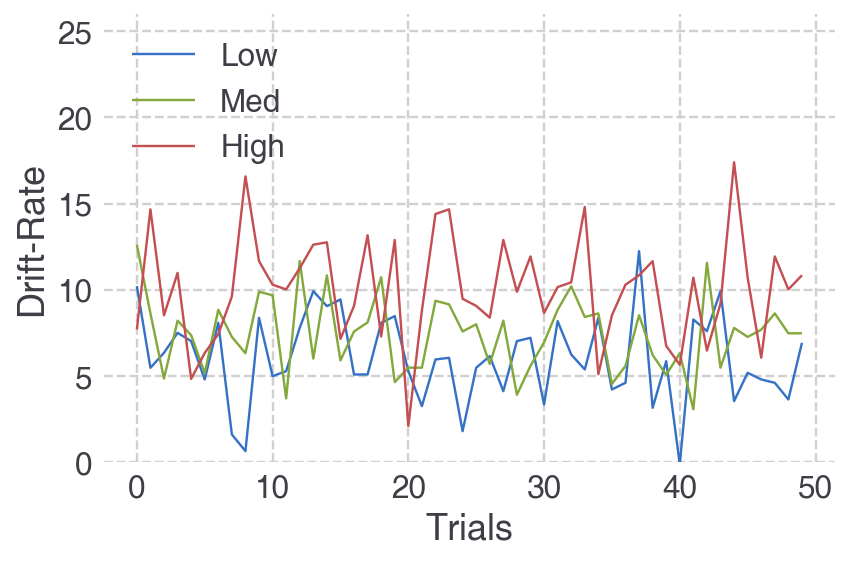

In [33]:
vLowTrials = v0 + vBetaLow * data[data.cond=='low'][driftVar] 
vMedTrials = v0 + vBetaMed * data[data.cond=='med'][driftVar] 
vHighTrials = v0 + vBetaHigh * data[data.cond=='high'][driftVar] 

plt.plot(vLowTrials[:50].values, label='Low')
plt.plot(vMedTrials[:50].values, label='Med')
plt.plot(vHighTrials[:50].values, label='High')

ax = plt.gca()
ax.set_ylabel('Drift-Rate')
ax.set_xlabel('Trials')
ax.set_ylim(0, 26)
ax.legend()

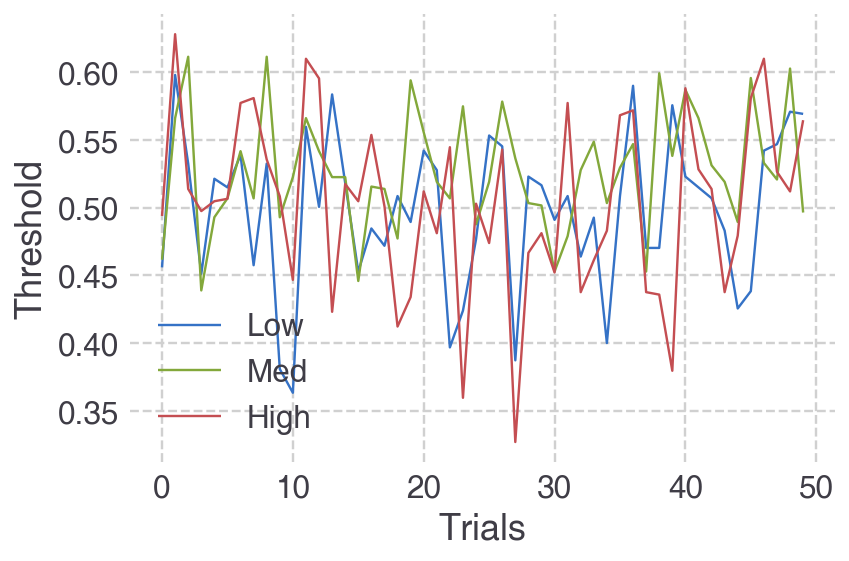

In [35]:
aLowTrials = a0 + aBetaLow * data[data.cond=='low'][thresholdVar] 
aMedTrials = a0 + aBetaMed * data[data.cond=='med'][thresholdVar] 
aHighTrials = a0 + aBetaHigh * data[data.cond=='high'][thresholdVar] 

plt.plot(aLowTrials[:50].values, label='Low')
plt.plot(aMedTrials[:50].values, label='Med')
plt.plot(aHighTrials[:50].values, label='High')

ax = plt.gca()
ax.set_ylabel('Threshold')
ax.set_xlabel('Trials')
# ax.set_ylim(0, 26)
ax.legend()

In [17]:
aRegressors = ['a_Intercept', "a_I_LR_mean:C(level)[1]", "a_I_LR_mean:C(level)[2]", "a_I_LR_mean:C(level)[3]"]
vRegressors = ['v_Intercept', "v_D_LR_diff:C(level)[1]", "v_D_LR_diff:C(level)[2]", "v_D_LR_diff:C(level)[3]"]
regressors = [aRegressors, vRegressors]

pdists = []; lvls = ['Low', 'Med', 'High']; params = ['a', 'v']
for param, paramRegs in zip(params, regressors):
    traces = va.nodes_db.ix[paramRegs, 'node']
    c0 = traces[0].trace().mean()
    condTraces = traces[1:]
    pdist = pd.DataFrame({lvl:cTrace.trace() for (lvl, cTrace) in zip(lvls, condTraces)})
    pdistTidy = pd.melt(pdist, var_name='level')
    pdistTidy['param'] = param
    pdists.append(pdistTidy)
pdists = pd.concat(pdists)
vdists = pdists[pdists.param=='v']
adists = pdists[pdists.param=='a']

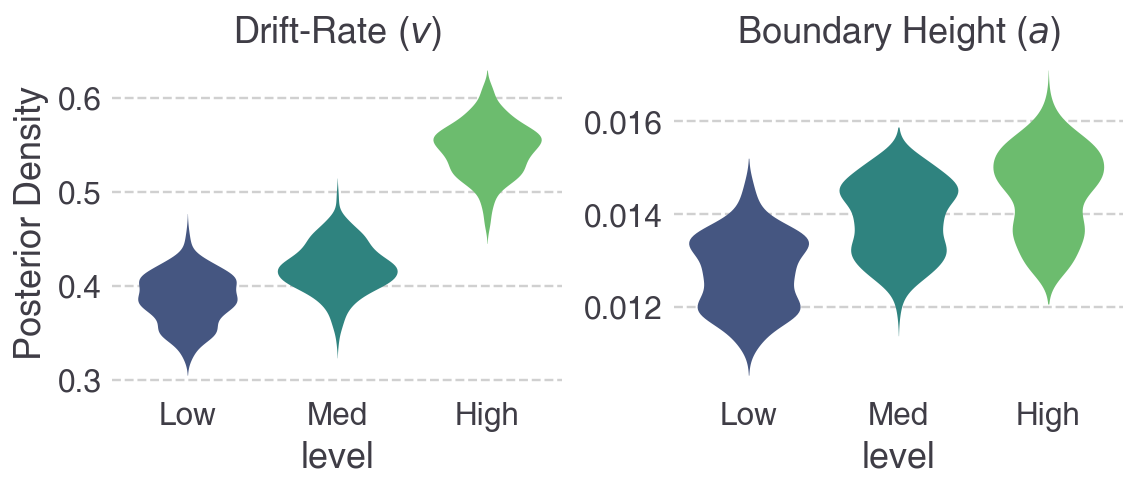

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.5))
sns.violinplot(x='level', y='value', data=vdists, palette='viridis', order=lvls, ax=ax1, linewidth=0)
sns.violinplot(x='level', y='value', data=adists, palette='viridis', order=lvls, ax=ax2, linewidth=0)
ax1.set_ylabel('Posterior Density')
ax2.set_ylabel('')
ax1.set_title('Drift-Rate ($v$)')
ax2.set_title('Boundary Height ($a$)')

plt.tight_layout()
sns.despine()
# figname = os.path.join('/Users/kyle/Desktop/', 'va_RegModel_Posteriors.png')
# f.savefig(figname, dpi=600)